In [65]:
from sklearn.datasets import load_boston
boston = load_boston()


In [66]:
print(boston.data.shape)

(506, 13)


In [67]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [68]:
print(boston.target) #value of Y

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [69]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [70]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [71]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE',axis=1)
Y = bos['PRICE']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test= train_test_split(X,Y, test_size = 0.33, random_state = 5)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(339, 13) (339,)
(167, 13) (167,)


In [73]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

print("After vectorizations")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

After vectorizations
(339, 13) (339,)
(167, 13) (167,)


In [74]:
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()


## part 1: My own version of SGD

In [75]:
 # Estimate linear regression coefficients using stochastic gradient descent
import numpy as np
def coefficients_sgd(train, l_rate, n_epoch):
    w = np.random.normal(0, 1, 13) # initialising w as (13x1) matrix
    b = np.random.normal(0, 1) # initialising b as a random scaler value
    for epoch in range(n_epoch):
        l_rate = l_rate/2
        i = 0
        for row in train:
            error = (Y_train[i] - (np.dot(w.T,row) + b))
            b = b + (2*l_rate * error)
            w = w + (2*l_rate * error)*row
            i += 1
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate,error))
    return (w,b)
 
# Calculate coefficients

l_rate = 1
n_epoch = 100
w,b = coefficients_sgd(X_train, l_rate, n_epoch)
print(w)
print(b)

>epoch=0, lrate=0.500, error=-46.044
>epoch=1, lrate=0.250, error=4.059
>epoch=2, lrate=0.125, error=0.459
>epoch=3, lrate=0.062, error=-1.126
>epoch=4, lrate=0.031, error=-2.255
>epoch=5, lrate=0.016, error=-2.691
>epoch=6, lrate=0.008, error=-2.715
>epoch=7, lrate=0.004, error=-2.735
>epoch=8, lrate=0.002, error=-2.720
>epoch=9, lrate=0.001, error=-2.678
>epoch=10, lrate=0.000, error=-2.648
>epoch=11, lrate=0.000, error=-2.631
>epoch=12, lrate=0.000, error=-2.623
>epoch=13, lrate=0.000, error=-2.618
>epoch=14, lrate=0.000, error=-2.616
>epoch=15, lrate=0.000, error=-2.615
>epoch=16, lrate=0.000, error=-2.614
>epoch=17, lrate=0.000, error=-2.614
>epoch=18, lrate=0.000, error=-2.614
>epoch=19, lrate=0.000, error=-2.614
>epoch=20, lrate=0.000, error=-2.614
>epoch=21, lrate=0.000, error=-2.614
>epoch=22, lrate=0.000, error=-2.614
>epoch=23, lrate=0.000, error=-2.614
>epoch=24, lrate=0.000, error=-2.614
>epoch=25, lrate=0.000, error=-2.614
>epoch=26, lrate=0.000, error=-2.614
>epoch=27, l

## part 2: predicted values Vs actual values of My own SGD

In [76]:
def predict(w,b,X_test):
    y_predicted = []
    for row in X_test:
        y = np.dot(w.T,row) + b
        y_predicted.append(y)
    return y_predicted

In [77]:
y_predicted = predict(w,b,X_test)


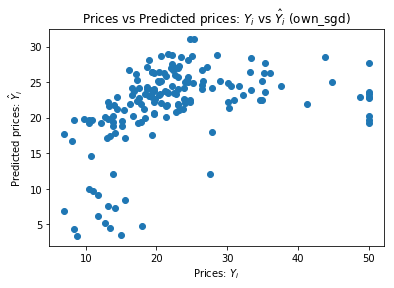

In [78]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_predicted)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (own_sgd)")
plt.show()

## summary
- lots of points in x-range (15-25)
- lots of points in y-range (15-25)
- there are outliers xrange(50) they are predicted in range (18-25) by my model
- my prediction is good

## Part 3: predicted values Vs actual values of SGD from sklearn

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


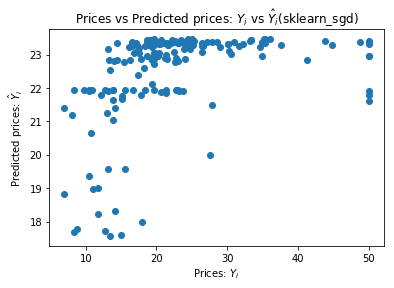

In [80]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(loss = 'squared_loss' ,fit_intercept=True)
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$(sklearn_sgd)")
plt.show()

## summary
- most of the prices is predicted as '23'
- there are outliers xrange(50) they are predicted in range (18-25)

## part 4: comparing weights

In [81]:
print(lm.coef_)

[-7.15569279e-02  7.51131682e-01  9.47988233e-02  2.56983395e-03
  1.14778126e-02  1.87491638e-01  1.11017076e+00  1.18749364e-01
  6.24167742e-02  5.90360999e+00  4.04102705e-01  1.02362150e+01
  4.59630778e-02]


In [82]:
w

array([-14.11572271, -31.09801633,   1.81805275,  -0.73741451,
        -1.54862015,   2.84273791, -34.01481513,  -1.10307373,
        14.8700715 ,  12.05657102,  -4.85674583,  33.03570001,
       -20.55053876])

In [83]:
dif = w - lm.coef_
dif

array([-14.04416578, -31.84914801,   1.72325392,  -0.73998434,
        -1.56009796,   2.65524627, -35.12498589,  -1.22182309,
        14.80765473,   6.15296103,  -5.26084853,  22.79948499,
       -20.59650183])

## MSE

In [84]:
def mse(y_predicted,Y_real):
    add = 0
    for i in range(len(Y_real)):
        add = (y_predicted[i] - Y_real[i])**2
    return add/len(Y_real)    


In [85]:
mse_own_sgd = mse(y_predicted,Y_test)
mse_own_sgd

0.2611136042990568

In [86]:
mse_sklearn_sgd = mse(Y_pred,Y_test)
mse_sklearn_sgd

0.26442943210377023

In [87]:
diff_mse = np.absolute(mse_own_sgd - mse_sklearn_sgd)
diff_mse

0.003315827804713456

## summary
- my MSE difference is quite low, which is good

<h1><font color = "blue"> a unknown query point from dataset without normalized.</font></h1>
- its label(y_q) = 24
- first point of Boston house prices dataset.

In [94]:
xq = np.array([0.00632,  18.0  ,2.31 , 0.0 , 0.538 , 6.575 , 65.2 , 4.0900 , 1.0 , 296.0 , 15.3, 396.90,  4.98])
xq = normalizer.transform(xq.reshape(1,-1))
print(xq)
yp = np.dot(xq,w) + b
yp

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 0.00000000e+00
  1.07590075e-03 1.31487871e-02 1.30387972e-01 8.17924550e-03
  1.99981553e-03 5.91945396e-01 3.05971776e-02 7.93726783e-01
  9.95908132e-03]]


array([24.97363047])

# summary
- i used my_own 'w' vector to predict the datapoint
- i got 24.97 which is quite close to 24.
- i bascially transform the query point which is already fitted for X_train.
- sir, if i missed anything(you asked for without preprocessing), please tell me, if there is another way i am excited to learn that trick.
- please give me response regarding this thing.
- thank you.